<a href="https://colab.research.google.com/github/VentoVergil/IBM-Data-Science/blob/main/IBM_Data_Science_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [62]:
import requests
import pandas as pd
import numpy as np
import datetime
from pandas import json_normalize
from time import sleep
import sqlite3
import prettytable
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
prettytable.DEFAULT = 'DEFAULT'

In [3]:
#!pip install ipython-sql

# Data Collection

## Api functions

In [ ]:
# Takes the dataset and use the rocket column to call the API and append the data to the list
def getBoosterVersion(data):
    for x in data['rocket']:
       if x:
        response = requests.get("https://api.spacexdata.com/v4/rockets/"+str(x)).json()
        BoosterVersion.append(response['name'])

# Takes the dataset and use the launchpad column to call the API and append the data to the list
def getLaunchSite(data):
    for x in data['launchpad']:
       if x:
         response = requests.get(f"https://api.spacexdata.com/v4/launchpads/{x}").json()
         Longitude.append(response['longitude'])
         Latitude.append(response['latitude'])
         LaunchSite.append(response['name'])

# Takes the dataset and uses the payloads column to call the API and append the data to the lists
def getPayloadData(data):
    for load in data['payloads']:
       if load:
        response = requests.get("https://api.spacexdata.com/v4/payloads/"+load).json()
        PayloadMass.append(response['mass_kg'])
        Orbit.append(response['orbit'])

# Takes the dataset and uses the cores column to call the API and append the data to the lists
def getCoreData(data):
    for core in data['cores']:
            if core['core'] != None:
                response = requests.get("https://api.spacexdata.com/v4/cores/"+core['core']).json()
                Block.append(response['block'])
                ReusedCount.append(response['reuse_count'])
                Serial.append(response['serial'])
            else:
                Block.append(None)
                ReusedCount.append(None)
                Serial.append(None)
            Outcome.append(str(core['landing_success'])+' '+str(core['landing_type']))
            Flights.append(core['flight'])
            GridFins.append(core['gridfins'])
            Reused.append(core['reused'])
            Legs.append(core['legs'])
            LandingPad.append(core['landpad'])

In [ ]:
spacex_url="https://api.spacexdata.com/v4/launches/past"

In [ ]:
response = requests.get(spacex_url)

## Task 1: Request and parse the SpaceX launch data using the GET request


In [ ]:
static_json_url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/API_call_spacex_api.json'
response=requests.get(static_json_url)
response.status_code

200

In [ ]:
data = pd.json_normalize(response.json())

In [ ]:
data.head(2)

,static_fire_date_utc,static_fire_date_unix,tbd,net,window,rocket,success,details,crew,ships,capsules,payloads,launchpad,auto_update,failures,flight_number,name,date_utc,date_unix,date_local,date_precision,upcoming,cores,id,fairings.reused,fairings.recovery_attempt,fairings.recovered,fairings.ships,links.patch.small,links.patch.large,links.reddit.campaign,links.reddit.launch,links.reddit.media,links.reddit.recovery,links.flickr.small,links.flickr.original,links.presskit,links.webcast,links.youtube_id,links.article,links.wikipedia,fairings
0,2006-03-17T00:00:00.000Z,1.142554e+09,False,False,0.0,5e9d0d95eda69955f709d1eb,False,Engine failure at 33 seconds and loss of vehicle,[],[],[],[5eb0e4b5b6c3bb0006eeb1e1],5e9e4502f5090995de566f86,True,"[{'time': 33, 'altitude': None, 'reason': 'merlin engine failure'}]",1,FalconSat,2006-03-24T22:30:00.000Z,1143239400,2006-03-25T10:30:00+12:00,hour,False,"[{'core': '5e9e289df35918033d3b2623', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",5eb87cd9ffd86e000604b32a,False,False,False,[],https://images2.imgbox.com/3c/0e/T8iJcSN3_o.png,https://images2.imgbox.com/40/e3/GypSkayF_o.png,None,None,None,None,[],[],None,https://www.youtube.com/watch?v=0a_00nJ_Y88,0a_00nJ_Y88,https://www.space.com/2196-spacex-inaugural-falcon-1-rocket-lost-launch.html,https://en.wikipedia.org/wiki/DemoSat,NaN
1,None,NaN,False,False,0.0,5e9d0d95eda69955f709d1eb,False,"Successful first stage burn and transition to second stage, maximum altitude 289 km, Premature engine shutdown at T+7 min 30 s, Failed to reach orbit, Failed to recover first stage",[],[],[],[5eb0e4b6b6c3bb0006eeb1e2],5e9e4502f5090995de566f86,True,"[{'time': 301, 'altitude': 289, 'reason': 'harmonic oscillation leading to premature engine shutdown'}]",2,DemoSat,2007-03-21T01:10:00.000Z,1174439400,2007-03-21T13:10:00+12:00,hour,False,"[{'core': '5e9e289ef35918416a3b2624', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",5eb87cdaffd86e000604b32b,False,False,False,[],https://images2.imgbox.com/4f/e3/I0lkuJ2e_o.png,https://images2.imgbox.com/be/e7/iNqsqVYM_o.png,None,None,None,None,[],[],None,https://www.youtube.com/watch?v=Lk4zQ2wP-Nc,Lk4zQ2wP-Nc,https://www.space.com/3590-spacex-falcon-1-rocket-fails-reach-orbit.html,https://en.wikipedia.org/wiki/DemoSat,NaN


In [ ]:
# Lets take a subset of our dataframe keeping only the features we want and the flight number, and date_utc.
data = data[['rocket', 'payloads', 'launchpad', 'cores', 'flight_number', 'date_utc']]

# We will remove rows with multiple cores because those are falcon rockets with 2 extra rocket boosters and rows that have multiple payloads in a single rocket.
data = data[data['cores'].map(len)==1]
data = data[data['payloads'].map(len)==1]

# Since payloads and cores are lists of size 1 we will also extract the single value in the list and replace the feature.
data['cores'] = data['cores'].map(lambda x : x[0])
data['payloads'] = data['payloads'].map(lambda x : x[0])

# We also want to convert the date_utc to a datetime datatype and then extracting the date leaving the time
data['date'] = pd.to_datetime(data['date_utc']).dt.date

# Using the date we will restrict the dates of the launches
data = data[data['date'] <= datetime.date(2020, 11, 13)]

In [ ]:
data.head(2)

,rocket,payloads,launchpad,cores,flight_number,date_utc,date
0,5e9d0d95eda69955f709d1eb,5eb0e4b5b6c3bb0006eeb1e1,5e9e4502f5090995de566f86,"{'core': '5e9e289df35918033d3b2623', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}",1,2006-03-24T22:30:00.000Z,2006-03-24
1,5e9d0d95eda69955f709d1eb,5eb0e4b6b6c3bb0006eeb1e2,5e9e4502f5090995de566f86,"{'core': '5e9e289ef35918416a3b2624', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}",2,2007-03-21T01:10:00.000Z,2007-03-21


In [ ]:
#Global variables
BoosterVersion = []
PayloadMass = []
Orbit = []
LaunchSite = []
Outcome = []
Flights = []
GridFins = []
Reused = []
Legs = []
LandingPad = []
Block = []
ReusedCount = []
Serial = []
Longitude = []
Latitude = []

In [ ]:
# Call getBoosterVersion
getBoosterVersion(data)

In [ ]:
BoosterVersion[0:5]

['Falcon 1', 'Falcon 1', 'Falcon 1', 'Falcon 1', 'Falcon 9']

In [ ]:
# get launchsite data
getLaunchSite(data)

In [ ]:
print(LaunchSite[0:5])

['Kwajalein Atoll', 'Kwajalein Atoll', 'Kwajalein Atoll', 'Kwajalein Atoll', 'CCSFS SLC 40']


In [ ]:
# Call getPayloadData
getPayloadData(data)

In [ ]:
print(PayloadMass[0:5])

[20, None, 165, 200, None]


In [ ]:
# Call getCoreData
getCoreData(data)

In [ ]:
print(Flights[0:5])

[1, 1, 1, 1, 1]


In [ ]:
launch_dict = {
'FlightNumber': list(data['flight_number']),
'Date': list(data['date']),
'BoosterVersion':BoosterVersion,
'PayloadMass':PayloadMass,
'Orbit':Orbit,
'LaunchSite':LaunchSite,
'Outcome':Outcome,
'Flights':Flights,
'GridFins':GridFins,
'Reused':Reused,
'Legs':Legs,
'LandingPad':LandingPad,
'Block':Block,
'ReusedCount':ReusedCount,
'Serial':Serial,
'Longitude': Longitude,
'Latitude': Latitude
                }

In [ ]:
launch_data = pd.DataFrame(launch_dict)
launch_data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2006-03-24,Falcon 1,20.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin1A,167.743129,9.047721
1,2,2007-03-21,Falcon 1,NaN,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin2A,167.743129,9.047721
2,4,2008-09-28,Falcon 1,165.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin2C,167.743129,9.047721
3,5,2009-07-13,Falcon 1,200.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin3C,167.743129,9.047721
4,6,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0003,-80.577366,28.561857


In [ ]:
launch_data.describe()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Longitude,Latitude
count,94.000000,88.000000,94.000000,90.000000,94.000000,94.000000,94.000000
mean,54.202128,5919.165341,1.755319,3.500000,3.053191,-75.553302,28.581782
std,30.589048,4909.689575,1.197544,1.595288,4.153938,53.391880,4.639981
min,1.000000,20.000000,1.000000,1.000000,0.000000,-120.610829,9.047721
25%,28.250000,2406.250000,1.000000,2.000000,0.000000,-80.603956,28.561857
50%,52.500000,4414.000000,1.000000,4.000000,1.000000,-80.577366,28.561857
75%,81.500000,9543.750000,2.000000,5.000000,4.000000,-80.577366,28.608058
max,106.000000,15600.000000,6.000000,5.000000,13.000000,167.743129,34.632093


## Task 2: Filter the dataframe to only include `Falcon 9` launches

In [ ]:
f9 = launch_data.query("BoosterVersion=='Falcon 9'")
f9.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
4,6,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0003,-80.577366,28.561857
5,8,2012-05-22,Falcon 9,525.0,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0005,-80.577366,28.561857
6,10,2013-03-01,Falcon 9,677.0,ISS,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0007,-80.577366,28.561857
7,11,2013-09-29,Falcon 9,500.0,PO,VAFB SLC 4E,False Ocean,1,False,False,False,None,1.0,0,B1003,-120.610829,34.632093
8,12,2013-12-03,Falcon 9,3170.0,GTO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B1004,-80.577366,28.561857


In [ ]:
f9 = f9.fillna(f9['PayloadMass'].mean()).infer_objects(copy=False)

In [ ]:
f9.to_csv('dataset_part_1.csv', index=False)

# Data Wrangling

 ## TASK 1: Calculate the number of launches on each site

In [ ]:
round((len(f9) - f9.count())/ len(f9), 2)

In [ ]:
f9['LaunchSite'].value_counts()

,count
LaunchSite,
CCSFS SLC 40,55
KSC LC 39A,22
VAFB SLC 4E,13


## TASK 2: Calculate the number and occurrence of each orbit

In [ ]:
f9['Orbit'].value_counts()

,count
Orbit,
GTO,27
ISS,21
VLEO,14
PO,9
LEO,7
SSO,5
MEO,3
HEO,1
ES-L1,1


## TASK 3: Calculate the number and occurence of mission outcome of the orbits

In [ ]:
# Split outcomes to mission status and landing status
split_outcomes = f9['Outcome'].str.split(' ', expand=True).rename(columns={0:'mission_status', 1:'landing_loc'})

# Merge new split outcome columns to dataframe
f9 = f9.merge(split_outcomes, left_index=True, right_index=True)

In [ ]:
f9.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,mission_status,landing_loc
4,6,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,6123.547647,1.0,0,B0003,-80.577366,28.561857,None,None
5,8,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,6123.547647,1.0,0,B0005,-80.577366,28.561857,None,None
6,10,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,6123.547647,1.0,0,B0007,-80.577366,28.561857,None,None
7,11,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,6123.547647,1.0,0,B1003,-120.610829,34.632093,False,Ocean
8,12,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,6123.547647,1.0,0,B1004,-80.577366,28.561857,None,None


In [ ]:
landing_outcomes = f9.query("mission_status=='True'")['Orbit'].value_counts()
landing_outcomes

,count
Orbit,
GTO,14
ISS,13
VLEO,12
PO,6
LEO,5
SSO,5
MEO,2
ES-L1,1
HEO,1


## TASK 4: Create a landing outcome label from Outcome column

In [ ]:
f9['mission_status_key'] = f9['mission_status'].apply(lambda x: 1 if x=='True' else 0)

In [ ]:
f9

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,mission_status,landing_loc,mission_status_key
4,6,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,6123.547647,1.0,0,B0003,-80.577366,28.561857,None,None,0
5,8,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,6123.547647,1.0,0,B0005,-80.577366,28.561857,None,None,0
6,10,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,6123.547647,1.0,0,B0007,-80.577366,28.561857,None,None,0
7,11,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,6123.547647,1.0,0,B1003,-120.610829,34.632093,False,Ocean,0
8,12,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,6123.547647,1.0,0,B1004,-80.577366,28.561857,None,None,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,102,2020-09-03,Falcon 9,15600.000000,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1060,-80.603956,28.608058,True,ASDS,1
90,103,2020-10-06,Falcon 9,15600.000000,VLEO,KSC LC 39A,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,13,B1058,-80.603956,28.608058,True,ASDS,1
91,104,2020-10-18,Falcon 9,15600.000000,VLEO,KSC LC 39A,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1051,-80.603956,28.608058,True,ASDS,1
92,105,2020-10-24,Falcon 9,15600.000000,VLEO,CCSFS SLC 40,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,12,B1060,-80.577366,28.561857,True,ASDS,1


In [ ]:
f9['mission_status_key'].value_counts(normalize=True)

,proportion
mission_status_key,
1,0.666667
0,0.333333


In [ ]:
f9.query("mission_status_key==1 & landing_loc=='ASDS'")

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,mission_status,landing_loc,mission_status_key
23,28,2016-04-08,Falcon 9,3136.000000,ISS,CCSFS SLC 40,True ASDS,1,True,False,True,5e9e3032383ecb6bb234e7ca,2.0,1,B1021,-80.577366,28.561857,True,ASDS,1
24,29,2016-05-06,Falcon 9,4696.000000,GTO,CCSFS SLC 40,True ASDS,1,True,False,True,5e9e3032383ecb6bb234e7ca,2.0,0,B1022,-80.577366,28.561857,True,ASDS,1
25,30,2016-05-27,Falcon 9,3100.000000,GTO,CCSFS SLC 40,True ASDS,1,True,False,True,5e9e3032383ecb6bb234e7ca,2.0,1,B1023,-80.577366,28.561857,True,ASDS,1
27,33,2016-08-14,Falcon 9,4600.000000,GTO,CCSFS SLC 40,True ASDS,1,True,False,True,5e9e3032383ecb6bb234e7ca,2.0,0,B1026,-80.577366,28.561857,True,ASDS,1
29,35,2017-01-14,Falcon 9,9600.000000,PO,VAFB SLC 4E,True ASDS,1,True,False,True,5e9e3033383ecbb9e534e7cc,3.0,1,B1029,-120.610829,34.632093,True,ASDS,1
32,38,2017-03-30,Falcon 9,5300.000000,GTO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,2.0,1,B1021,-80.603956,28.608058,True,ASDS,1
36,42,2017-06-23,Falcon 9,3669.000000,GTO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,3.0,1,B1029,-80.603956,28.608058,True,ASDS,1
37,43,2017-06-25,Falcon 9,9600.000000,PO,VAFB SLC 4E,True ASDS,1,True,False,True,5e9e3033383ecbb9e534e7cc,3.0,1,B1036,-120.610829,34.632093,True,ASDS,1
40,46,2017-08-24,Falcon 9,475.000000,SSO,VAFB SLC 4E,True ASDS,1,True,False,True,5e9e3033383ecbb9e534e7cc,3.0,1,B1038,-120.610829,34.632093,True,ASDS,1
42,48,2017-10-09,Falcon 9,9600.000000,PO,VAFB SLC 4E,True ASDS,1,True,False,True,5e9e3033383ecbb9e534e7cc,4.0,1,B1041,-120.610829,34.632093,True,ASDS,1


# EDA with SQL

## Load Data

In [ ]:
data_2 = pd.read_csv(filepath_or_buffer='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/data/Spacex.csv',
                     parse_dates=['Date'])

In [ ]:
data_2.head()

,Date,Time (UTC),Booster_Version,Launch_Site,Payload,PAYLOAD_MASS__KG_,Orbit,Customer,Mission_Outcome,Landing_Outcome
0,2010-06-04,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0,LEO,SpaceX,Success,Failure (parachute)
1,2010-12-08,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel of Brouere cheese",0,LEO (ISS),NASA (COTS) NRO,Success,Failure (parachute)
2,2012-05-22,7:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2,525,LEO (ISS),NASA (COTS),Success,No attempt
3,2012-10-08,0:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500,LEO (ISS),NASA (CRS),Success,No attempt
4,2013-03-01,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677,LEO (ISS),NASA (CRS),Success,No attempt


In [ ]:
con = sqlite3.connect("my_spacex_data.db") # create database
cur = con.cursor() # create cursor

In [ ]:
%load_ext sql

In [ ]:
%sql sqlite:///my_spacex_data.db

In [ ]:
data_2.to_sql(name="spacex_data", con=con, if_exists='replace',method="multi")

101

In [ ]:
%%sql
Select * from spacex_data

 * sqlite:///my_spacex_data.db
Done.


index,Date,Time (UTC),Booster_Version,Launch_Site,Payload,PAYLOAD_MASS__KG_,Orbit,Customer,Mission_Outcome,Landing_Outcome
0,2010-06-04 00:00:00,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0,LEO,SpaceX,Success,Failure (parachute)
1,2010-12-08 00:00:00,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel of Brouere cheese",0,LEO (ISS),NASA (COTS) NRO,Success,Failure (parachute)
2,2012-05-22 00:00:00,7:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2,525,LEO (ISS),NASA (COTS),Success,No attempt
3,2012-10-08 00:00:00,0:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500,LEO (ISS),NASA (CRS),Success,No attempt
4,2013-03-01 00:00:00,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677,LEO (ISS),NASA (CRS),Success,No attempt
5,2013-09-29 00:00:00,16:00:00,F9 v1.1 B1003,VAFB SLC-4E,CASSIOPE,500,Polar LEO,MDA,Success,Uncontrolled (ocean)
6,2013-12-03 00:00:00,22:41:00,F9 v1.1,CCAFS LC-40,SES-8,3170,GTO,SES,Success,No attempt
7,2014-01-06 00:00:00,22:06:00,F9 v1.1,CCAFS LC-40,Thaicom 6,3325,GTO,Thaicom,Success,No attempt
8,2014-04-18 00:00:00,19:25:00,F9 v1.1,CCAFS LC-40,SpaceX CRS-3,2296,LEO (ISS),NASA (CRS),Success,Controlled (ocean)
9,2014-07-14 00:00:00,15:15:00,F9 v1.1,CCAFS LC-40,OG2 Mission 1 6 Orbcomm-OG2 satellites,1316,LEO,Orbcomm,Success,Controlled (ocean)


In [ ]:
%sql create table SPACEXTABLE as select * from spacex_data where Date is not null

 * sqlite:///my_spacex_data.db
Done.


[]

## Task 1: Display the names of the unique launch sites in the space mission

In [ ]:
print(list(data_2.columns))

['Date', 'Time (UTC)', 'Booster_Version', 'Launch_Site', 'Payload', 'PAYLOAD_MASS__KG_', 'Orbit', 'Customer', 'Mission_Outcome', 'Landing_Outcome']


In [ ]:
%%sql
select Distinct(Launch_Site) from spacex_data

 * sqlite:///my_spacex_data.db
Done.


Launch_Site
CCAFS LC-40
VAFB SLC-4E
KSC LC-39A
CCAFS SLC-40


## Task 2: Display 5 records where launch sites begin with the string 'CCA'

In [ ]:
%%sql
select * from spacex_data
where Launch_Site like 'CCA%'
limit 5

 * sqlite:///my_spacex_data.db
Done.


index,Date,Time (UTC),Booster_Version,Launch_Site,Payload,PAYLOAD_MASS__KG_,Orbit,Customer,Mission_Outcome,Landing_Outcome
0,2010-06-04 00:00:00,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0,LEO,SpaceX,Success,Failure (parachute)
1,2010-12-08 00:00:00,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel of Brouere cheese",0,LEO (ISS),NASA (COTS) NRO,Success,Failure (parachute)
2,2012-05-22 00:00:00,7:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2,525,LEO (ISS),NASA (COTS),Success,No attempt
3,2012-10-08 00:00:00,0:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500,LEO (ISS),NASA (CRS),Success,No attempt
4,2013-03-01 00:00:00,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677,LEO (ISS),NASA (CRS),Success,No attempt


## Task 3: Display the total payload mass carried by boosters launched by NASA (CRS)

In [ ]:
%%sql
Select SUM(PAYLOAD_MASS__KG_) from spacex_data
where Customer='NASA (CRS)'

 * sqlite:///my_spacex_data.db
Done.


SUM(PAYLOAD_MASS__KG_)
45596


## Task 4: Display average payload mass carried by booster version F9 v1.1

In [ ]:
%%sql
select AVG(PAYLOAD_MASS__KG_) from spacex_data
where Booster_Version='F9 v1.1'

 * sqlite:///my_spacex_data.db
Done.


AVG(PAYLOAD_MASS__KG_)
2928.4


## Task 5: List the date when the first succesful landing outcome in ground pad was acheived.

In [ ]:
%%sql
select MIN(Date) from spacex_data
where Landing_Outcome='Success (ground pad)'

 * sqlite:///my_spacex_data.db
Done.


MIN(Date)
2015-12-22 00:00:00


## Task 6: List the names of the boosters which have success in drone ship and have payload mass greater than 4000 but less than 6000

In [ ]:
%%sql
select Booster_Version from spacex_data
where Landing_Outcome='Success (drone ship)'
and PAYLOAD_MASS__KG_ between 4000 and 6000

 * sqlite:///my_spacex_data.db
Done.


Booster_Version
F9 FT B1022
F9 FT B1026
F9 FT B1021.2
F9 FT B1031.2


## Task 7: List the total number of successful and failure mission outcomes



In [ ]:
%%sql
select Mission_Outcome, count(*) as Count from spacex_data
group by Mission_Outcome
order by Count desc

 * sqlite:///my_spacex_data.db
Done.


Mission_Outcome,Count
Success,98
Success (payload status unclear),1
Success,1
Failure (in flight),1


## Task 8: List all the booster_versions that have carried the maximum payload mass, using a subquery with a suitable aggregate function

In [ ]:
%%sql
select Booster_Version from spacex_data
where PAYLOAD_MASS__KG_ = (select MAX(PAYLOAD_MASS__KG_) from spacex_data)

 * sqlite:///my_spacex_data.db
Done.


Booster_Version
F9 B5 B1048.4
F9 B5 B1049.4
F9 B5 B1051.3
F9 B5 B1056.4
F9 B5 B1048.5
F9 B5 B1051.4
F9 B5 B1049.5
F9 B5 B1060.2
F9 B5 B1058.3
F9 B5 B1051.6


## Task 9: List the records which will display the month names, failure landing_outcomes in drone ship ,booster versions, launch_site for the months in year 2015.

In [ ]:
%%sql
select strftime('%m',Date) as Month, Landing_Outcome, Booster_Version, Launch_Site from spacex_data
where Landing_Outcome='Failure (drone ship)'
and strftime('%Y',Date) = 2015

 * sqlite:///my_spacex_data.db
Done.


Month,Landing_Outcome,Booster_Version,Launch_Site


## Task 10: Rank the count of landing outcomes (such as Failure (drone ship) or Success (ground pad)) between the date 2010-06-04 and 2017-03-20, in descending order.

In [ ]:
%%sql
select Landing_Outcome, count(*) as Count from spacex_data
where Date between '2010-06-04' and '2017-03-20'
group by Landing_Outcome
order by Count desc

 * sqlite:///my_spacex_data.db
Done.


Landing_Outcome,Count
No attempt,10
Success (drone ship),5
Failure (drone ship),5
Success (ground pad),3
Controlled (ocean),3
Uncontrolled (ocean),2
Failure (parachute),2
Precluded (drone ship),1


In [ ]:
%%sql
select Sum(PAYLOAD_MASS__KG_) as kkk from spacex_data

 * sqlite:///my_spacex_data.db
Done.


kkk
619967


In [ ]:
data_2

,Date,Time (UTC),Booster_Version,Launch_Site,Payload,PAYLOAD_MASS__KG_,Orbit,Customer,Mission_Outcome,Landing_Outcome
0,2010-06-04,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0,LEO,SpaceX,Success,Failure (parachute)
1,2010-12-08,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel of Brouere cheese",0,LEO (ISS),NASA (COTS) NRO,Success,Failure (parachute)
2,2012-05-22,7:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2,525,LEO (ISS),NASA (COTS),Success,No attempt
3,2012-10-08,0:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500,LEO (ISS),NASA (CRS),Success,No attempt
4,2013-03-01,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677,LEO (ISS),NASA (CRS),Success,No attempt
...,...,...,...,...,...,...,...,...,...,...
96,2020-11-05,23:24:23,F9 B5B1062.1,CCAFS SLC-40,"GPS III-04 , Crew-1",4311,MEO,USSF,Success,Success
97,2020-11-16,0:27:00,F9 B5B1061.1,KSC LC-39A,"Crew-1, Sentinel-6 Michael Freilich",12500,LEO (ISS),NASA (CCP),Success,Success
98,2020-11-21,17:17:08,F9 B5B1063.1,VAFB SLC-4E,"Sentinel-6 Michael Freilich, Starlink 15 v1.0",1192,LEO,NASA / NOAA / ESA / EUMETSAT,Success,Success
99,2020-11-25,2:13:00,F9 B5 B1049.7,CCAFS SLC-40,"Starlink 15 v1.0, SpaceX CRS-21",15600,LEO,SpaceX,Success,Success


# EDA with Pandas

In [ ]:
data_3 = pd.read_csv(filepath_or_buffer= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv",
                     parse_dates=['Date'])

In [ ]:
data_3.isna().sum()

In [ ]:
data_3.corr(numeric_only=True)

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Longitude,Latitude,Class
FlightNumber,1.000000,0.596307,0.652842,0.442364,0.635844,0.373619,0.932411,0.735193,0.055256,-0.054194,0.401923
PayloadMass,0.596307,1.000000,0.665218,0.258011,0.468393,0.192318,0.518165,0.612327,0.016181,-0.014655,0.199992
Flights,0.652842,0.665218,1.000000,0.194457,0.782631,0.157727,0.519603,0.684802,0.085228,-0.084547,0.149787
GridFins,0.442364,0.258011,0.194457,1.000000,0.229341,0.902302,0.438023,0.410324,-0.143677,0.144427,0.642540
Reused,0.635844,0.468393,0.782631,0.229341,1.000000,0.155552,0.548036,0.594109,-0.042160,0.042669,0.207582
Legs,0.373619,0.192318,0.157727,0.902302,0.155552,1.000000,0.368994,0.375496,-0.057701,0.058161,0.673825
Block,0.932411,0.518165,0.519603,0.438023,0.548036,0.368994,1.000000,0.743340,-0.030037,0.031621,0.416015
ReusedCount,0.735193,0.612327,0.684802,0.410324,0.594109,0.375496,0.743340,1.000000,-0.101877,0.102668,0.466584
Longitude,0.055256,0.016181,0.085228,-0.143677,-0.042160,-0.057701,-0.030037,-0.101877,1.000000,-0.999966,-0.089519
Latitude,-0.054194,-0.014655,-0.084547,0.144427,0.042669,0.058161,0.031621,0.102668,-0.999966,1.000000,0.090782


## Task 1: Visualize the relationship between Flight Number and Launch Site

In [ ]:
data_3['L']

<Axes: xlabel='FlightNumber', ylabel='LaunchSite'>

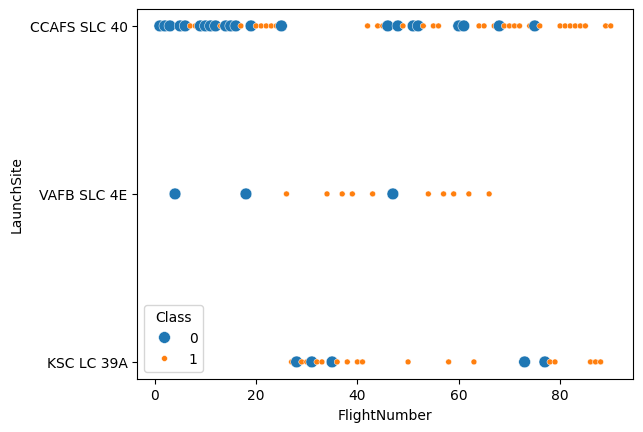

In [ ]:
sns.scatterplot(data=data_3, y='LaunchSite', x='FlightNumber', hue='Class', size='Class')

Task 2: Visualize the relationship between Payload Mass and Launch Site

<Axes: xlabel='PayloadMass', ylabel='LaunchSite'>

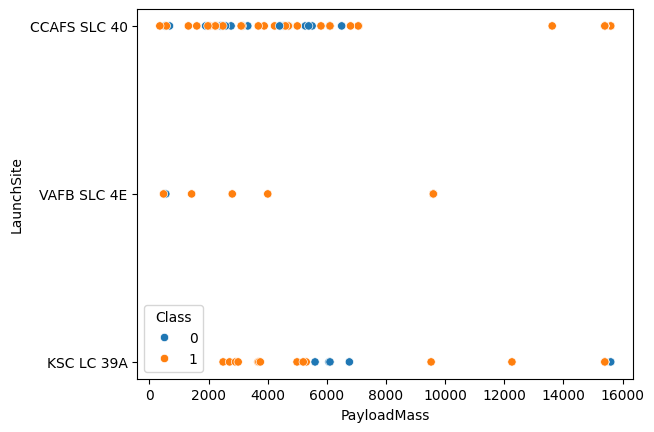

In [ ]:
sns.scatterplot(data=data_3, x='PayloadMass', y='LaunchSite', hue='Class')

## Task 3: Visualize the relationship between success rate of each orbit type

In [ ]:
data_3.columns

Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude',
       'Class'],
      dtype='object')

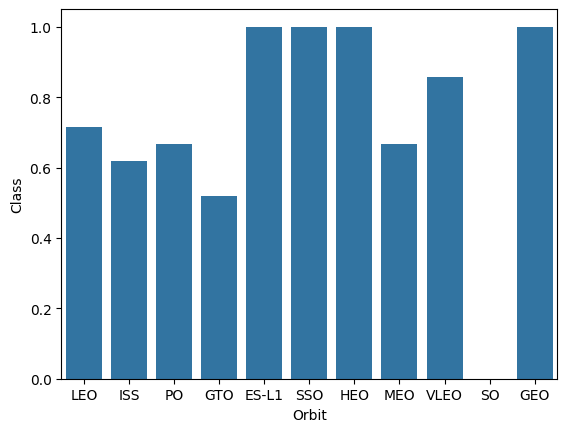

In [ ]:
p1 = sns.barplot(data=data_3, y='Class', x='Orbit', errorbar=None)

## Task 4

<Axes: xlabel='FlightNumber', ylabel='Orbit'>

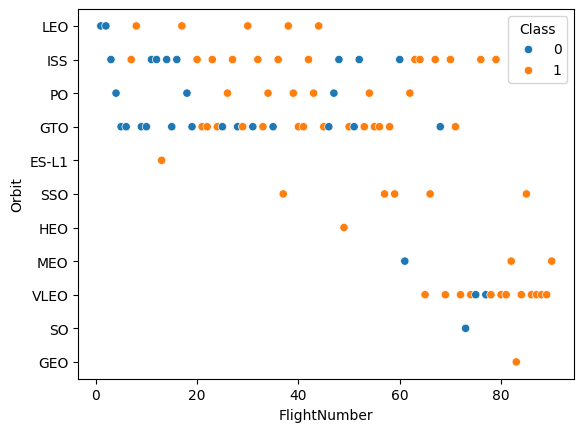

In [ ]:
sns.scatterplot(data=data_3, x='FlightNumber', y='Orbit', hue='Class')

## Task 5

<Axes: xlabel='PayloadMass', ylabel='Orbit'>

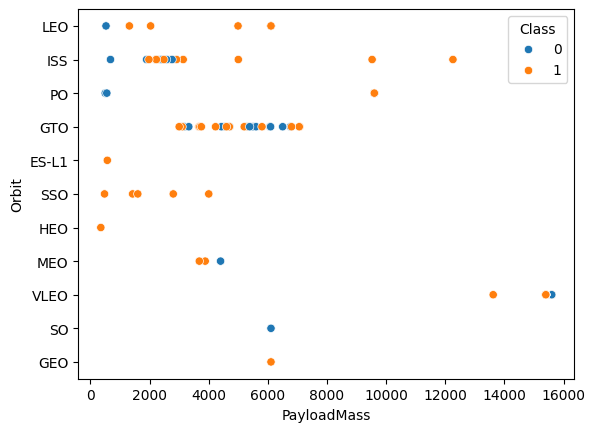

In [ ]:
sns.scatterplot(data=data_3, x='PayloadMass', y='Orbit', hue='Class')

## Task 6

In [ ]:
data_3['Year'] = data_3['Date'].dt.year
data_3.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class,Year
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0,2010
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0,2012
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0,2013
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0,2013
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0,2013


[Text(0.5, 1.0, 'Launch Sucess per year')]

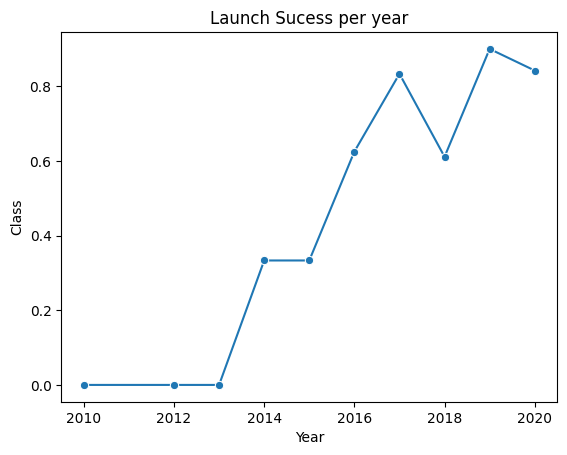

In [ ]:
sns.lineplot(data=data_3, x='Year', y='Class', errorbar=None, marker='o').set(title='Launch Sucess per year')

# Dashboard

In [ ]:
bb

# Feature Engineering

In [ ]:
features = data_3[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [ ]:
features_one_hot = (
    features.merge(pd.get_dummies(features[['Orbit', 'LaunchSite','LandingPad','Serial']],dtype=int), left_index=True, right_index=True)
    .drop(columns=['Orbit', 'LaunchSite','LandingPad','Serial'])
)

features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,Orbit_VLEO,LaunchSite_CCAFS SLC 40,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc,Serial_B0003,Serial_B0005,Serial_B0007,Serial_B1003,Serial_B1004,Serial_B1005,Serial_B1006,Serial_B1007,Serial_B1008,Serial_B1010,Serial_B1011,Serial_B1012,Serial_B1013,Serial_B1015,Serial_B1016,Serial_B1017,Serial_B1018,Serial_B1019,Serial_B1020,Serial_B1021,Serial_B1022,Serial_B1023,Serial_B1025,Serial_B1026,Serial_B1028,Serial_B1029,Serial_B1030,Serial_B1031,Serial_B1032,Serial_B1034,Serial_B1035,Serial_B1036,Serial_B1037,Serial_B1038,Serial_B1039,Serial_B1040,Serial_B1041,Serial_B1042,Serial_B1043,Serial_B1044,Serial_B1045,Serial_B1046,Serial_B1047,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,1,False,False,False,1.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,1,False,False,False,1.0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,1,False,False,False,1.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,1,False,False,False,1.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
features_one_hot.astype(float)

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,Orbit_VLEO,LaunchSite_CCAFS SLC 40,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc,Serial_B0003,Serial_B0005,Serial_B0007,Serial_B1003,Serial_B1004,Serial_B1005,Serial_B1006,Serial_B1007,Serial_B1008,Serial_B1010,Serial_B1011,Serial_B1012,Serial_B1013,Serial_B1015,Serial_B1016,Serial_B1017,Serial_B1018,Serial_B1019,Serial_B1020,Serial_B1021,Serial_B1022,Serial_B1023,Serial_B1025,Serial_B1026,Serial_B1028,Serial_B1029,Serial_B1030,Serial_B1031,Serial_B1032,Serial_B1034,Serial_B1035,Serial_B1036,Serial_B1037,Serial_B1038,Serial_B1039,Serial_B1040,Serial_B1041,Serial_B1042,Serial_B1043,Serial_B1044,Serial_B1045,Serial_B1046,Serial_B1047,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6104.959412,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,1.0,1.0,1.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
86,87.0,15400.000000,3.0,1.0,1.0,1.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
87,88.0,15400.000000,6.0,1.0,1.0,1.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [ ]:
features.merge(pd.get_dummies(features[['Orbit', 'LaunchSite','LandingPad','Serial']],dtype=int), left_index=True, right_index=True)

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,Orbit_VLEO,LaunchSite_CCAFS SLC 40,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc,Serial_B0003,Serial_B0005,Serial_B0007,Serial_B1003,Serial_B1004,Serial_B1005,Serial_B1006,Serial_B1007,Serial_B1008,Serial_B1010,Serial_B1011,Serial_B1012,Serial_B1013,Serial_B1015,Serial_B1016,Serial_B1017,Serial_B1018,Serial_B1019,Serial_B1020,Serial_B1021,Serial_B1022,Serial_B1023,Serial_B1025,Serial_B1026,Serial_B1028,Serial_B1029,Serial_B1030,Serial_B1031,Serial_B1032,Serial_B1034,Serial_B1035,Serial_B1036,Serial_B1037,Serial_B1038,Serial_B1039,Serial_B1040,Serial_B1041,Serial_B1042,Serial_B1043,Serial_B1044,Serial_B1045,Serial_B1046,Serial_B1047,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,15400.000000,VLEO,KSC LC 39A,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,2,B1060,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
86,87,15400.000000,VLEO,KSC LC 39A,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,2,B1058,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
87,88,15400.000000,VLEO,KSC LC 39A,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,5,B1051,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
88,89,15400.000000,VLEO,CCAFS SLC 40,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,2,B1060,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
len(features.columns)

12

# ML

In [4]:
data4 = pd.read_csv(filepath_or_buffer="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv",
                    parse_dates=['Date'])

data5 = pd.read_csv(filepath_or_buffer= 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv')

In [5]:
target = data4['Class'].to_numpy()

In [6]:
ss = StandardScaler()
scaled_features = ss.fit_transform(data5)

## T3

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=16, stratify=target)

In [8]:
Y_test.shape

(18,)

## T4

In [41]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [42]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()

In [43]:
gsv = GridSearchCV(lr, param_grid=parameters, cv=10)
gsv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [44]:
print("tuned hpyerparameters :(best parameters) ",gsv.best_params_)
print("accuracy :",gsv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8196428571428571


## T5

In [72]:
lr_score = gsv.score(X_test, y=Y_test)

Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

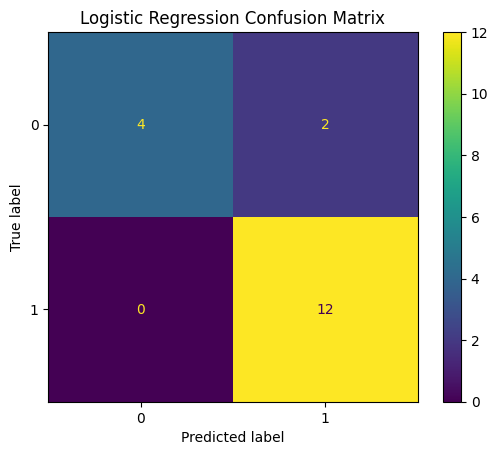

In [46]:
logistic_confusion = confusion_matrix(y_pred=gsv.predict(X_test), y_true=Y_test)
logistic_confusion_display = ConfusionMatrixDisplay(confusion_matrix=logistic_confusion)
logistic_confusion_display.plot()
plt.title('Logistic Regression Confusion Matrix')

## T6

In [47]:
parameters_svc = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [48]:
svgsv = GridSearchCV(svm, param_grid=parameters_svc, cv=10)
svgsv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [49]:
print("tuned hpyerparameters :(best parameters) ",svgsv.best_params_)
print("accuracy :",svgsv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': np.float64(0.03162277660168379), 'gamma': np.float64(0.001), 'kernel': 'linear'}
accuracy : 0.8196428571428571


## T7

In [71]:
svm_score = svgsv.score(X_test, y=Y_test)

Text(0.5, 1.0, 'SVM Confusion Matrix')

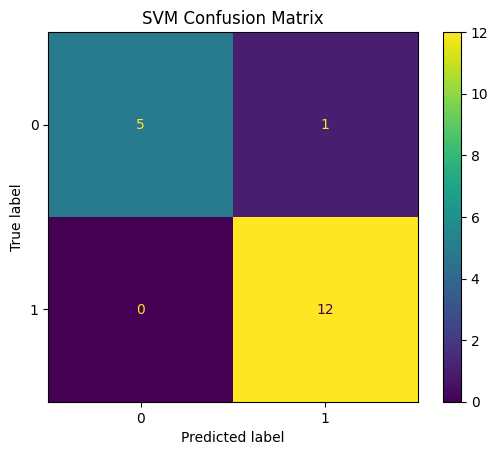

In [51]:
svm_confusion = confusion_matrix(y_pred=svgsv.predict(X_test), y_true=Y_test)
svm_confusion_display = ConfusionMatrixDisplay(confusion_matrix=svm_confusion)
svm_confusion_display.plot()
plt.title('SVM Confusion Matrix')

## T8

In [55]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': [None, 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [56]:
dsv = GridSearchCV(tree, param_grid=parameters, cv=10,)
dsv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': [None, 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [57]:
print("tuned hpyerparameters :(best parameters) ",dsv.best_params_)
print("accuracy :",dsv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'random'}
accuracy : 0.8625


## T9

In [70]:
dsv_score = dsv.score(X_test, y=Y_test)

Text(0.5, 1.0, 'Decision Tree Confusion Matrix')

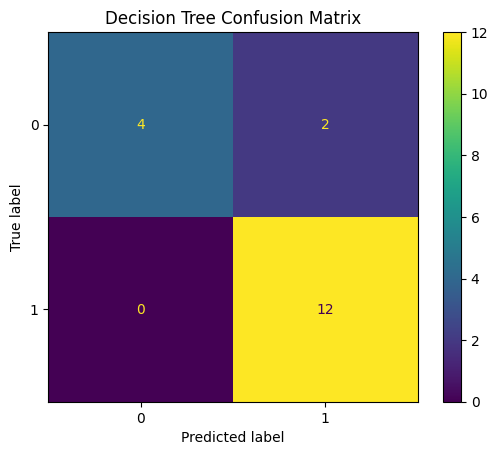

In [59]:
tree_confusion = confusion_matrix(y_pred=gsv.predict(X_test), y_true=Y_test)
tree_confusion_display = ConfusionMatrixDisplay(confusion_matrix=tree_confusion, )
tree_confusion_display.plot()
plt.title('Decision Tree Confusion Matrix')

## T10

In [63]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [64]:
ksv = GridSearchCV(KNN, param_grid=parameters, cv=10)
ksv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [65]:
print("tuned hpyerparameters :(best parameters) ",ksv.best_params_)
print("accuracy :",ksv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1}
accuracy : 0.8196428571428571


## T11

In [69]:
ksv_score = ksv.score(X_test, y=Y_test)

Text(0.5, 1.0, 'KNN Confusion Matrix')

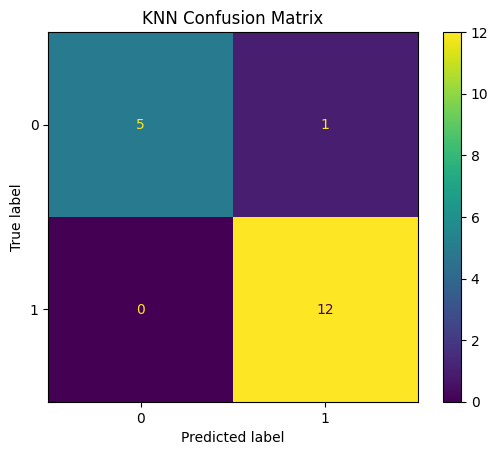

In [68]:
KNN_confusion = confusion_matrix(y_pred=ksv.predict(X_test), y_true=Y_test)
KNN_confusion_display = ConfusionMatrixDisplay(confusion_matrix=KNN_confusion)
KNN_confusion_display.plot()
plt.title('KNN Confusion Matrix')

## T12

[Text(0, 0.5, 'Test Accuracy')]

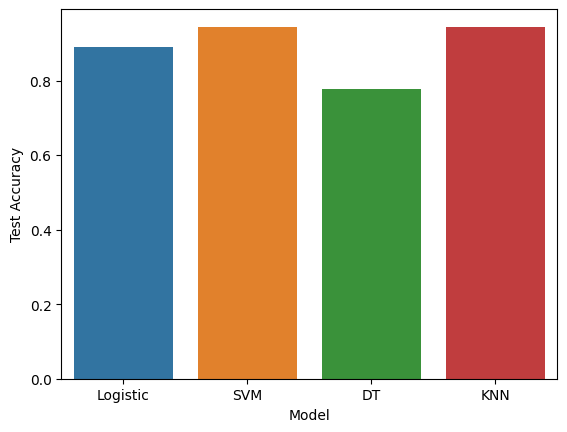

In [111]:
score_data = pd.Series({'Logistic':lr_score, 'SVM':svm_score, 'DT':dsv_score, 'KNN':ksv_score}).reset_index()
score_data.columns = ['Model', 'Score']
sns.barplot(data=score_data, x='Model', y='Score', hue='Model').set(ylabel='Test Accuracy')